<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/02_Currency_%26_Oil_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df_oil_currency = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dissertation/df_oil_currency.csv")
df_oil_currency['Date'] = pd.to_datetime(df_oil_currency['Date'])

df_oil_currency.set_index('Date', inplace=True)
df_oil_currency = df_oil_currency.asfreq('b')
df_oil_currency.head(10)


,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
2019-01-09,58.22,-0.534464,1.145607,0.446000,1.147974,1.141044,1.139108,1.131811,56.09,56.42,...,1.141683,59.46,60.00,58.39,58.24,59.52,2019,1,9,2
2019-01-10,59.46,-0.478251,1.155495,0.616671,1.145607,1.147974,1.141044,1.139108,58.22,56.09,...,1.139809,60.00,58.39,58.24,59.52,59.63,2019,1,10,3
2019-01-11,60.00,-0.453771,1.151013,0.539312,1.155495,1.145607,1.147974,1.141044,59.46,58.22,...,1.139264,58.39,58.24,59.52,59.63,60.90,2019,1,11,4
2019-01-14,58.39,-0.526758,1.146014,0.453024,1.151013,1.155495,1.145607,1.147974,60.00,59.46,...,1.136557,58.24,59.52,59.63,60.90,61.49,2019,1,14,0
2019-01-15,58.24,-0.533558,1.147289,0.475036,1.146014,1.151013,1.155495,1.145607,58.39,60.00,...,1.136932,59.52,59.63,60.90,61.49,60.66,2019,1,15,1
2019-01-16,59.52,-0.475531,1.141683,0.378276,1.147289,1.146014,1.151013,1.155495,58.24,58.39,...,1.136402,59.63,60.90,61.49,60.66,60.52,2019,1,16,2
2019-01-17,59.63,-0.470544,1.139809,0.345931,1.141683,1.147289,1.146014,1.151013,59.52,58.24,...,1.138822,60.90,61.49,60.66,60.52,60.22,2019,1,17,3
2019-01-18,60.90,-0.412971,1.139264,0.336520,1.139809,1.141683,1.147289,1.146014,59.63,59.52,...,1.131350,61.49,60.66,60.52,60.22,60.90,2019,1,18,4


,seasonal,trend,resid,Actual_USD_EUR_Price_t
Date,,,,
2019-01-08,0.000063,1.153611,-0.005700,1.147974
2019-01-09,0.000030,1.151937,-0.006361,1.145607
2019-01-10,0.000291,1.149220,0.005983,1.155495
2019-01-11,-0.000076,1.149083,0.002005,1.151013
2019-01-14,-0.000308,1.148299,-0.001977,1.146014
...,...,...,...,...
2023-06-26,-0.000308,1.094518,-0.003543,1.090667
2023-06-27,0.000063,1.092982,-0.001997,1.091048
2023-06-28,0.000030,1.091165,0.004527,1.095722


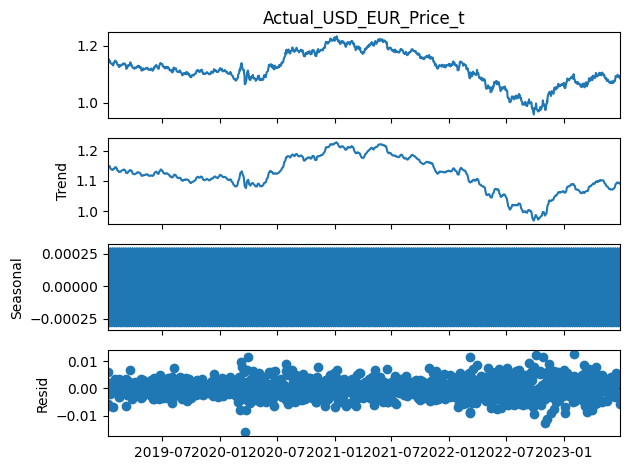

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df_oil_currency['Actual_USD_EUR_Price_t'], model='additive', extrapolate_trend='freq')
result_add.plot()
result_add_df=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
result_add_df


,seasonal,trend,resid,Actual_Oil_Price_t
Date,,,,
2019-01-08,0.113425,58.1408,-2.164225,56.09
2019-01-09,0.021467,58.3510,-0.152467,58.22
2019-01-10,-0.090592,58.4320,1.118592,59.46
2019-01-11,-0.013014,58.8620,1.151014,60.00
2019-01-14,-0.031286,59.1220,-0.700714,58.39
...,...,...,...,...
2023-06-26,-0.031286,75.0300,-0.348714,74.65
2023-06-27,0.113425,74.5320,0.504575,75.15
2023-06-28,0.021467,74.9320,-0.573467,74.38


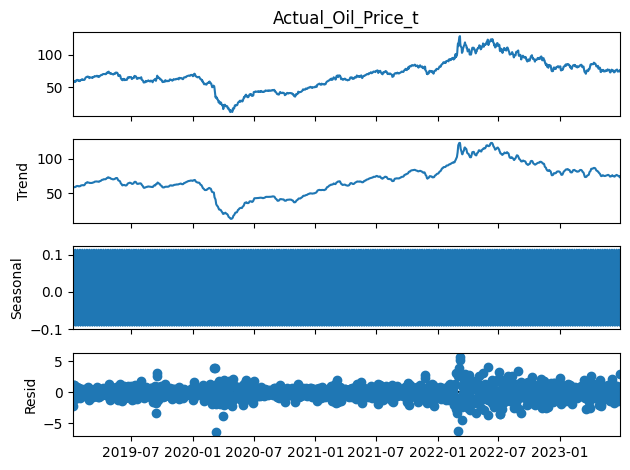

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df_oil_currency['Actual_Oil_Price_t'], model='additive', extrapolate_trend='freq')
result_add.plot()
result_add_df=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
result_add_df


In [16]:
# Convert the Timestamp objects to datetime.date objects
train_end_date = pd.to_datetime('2022-12-31')
test_end_date = pd.to_datetime('2023-06-30')


In [17]:
train_data = df_oil_currency[df_oil_currency.index <= train_end_date].copy()
test_data = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)].copy()
test_data.head(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,82.05,0.545828,1.070973,-0.842166,1.066075,1.062925,1.063717,1.064022,81.29,80.39,...,1.065632,82.05,76.88,75.77,76.15,77.57,2023,1,2,0
2023-01-03,82.05,0.545828,1.067771,-0.897432,1.070973,1.066075,1.062925,1.063717,82.05,81.29,...,1.073318,76.88,75.77,76.15,77.57,77.00,2023,1,3,1
2023-01-04,76.88,0.311455,1.054685,-1.123295,1.067771,1.070973,1.066075,1.062925,82.05,82.05,...,1.073895,75.77,76.15,77.57,77.00,78.23,2023,1,4,2
2023-01-05,75.77,0.261135,1.060637,-1.020580,1.054685,1.067771,1.070973,1.066075,76.88,82.05,...,1.076600,76.15,77.57,77.00,78.23,80.73,2023,1,5,3
2023-01-06,76.15,0.278361,1.052222,-1.165818,1.060637,1.054685,1.067771,1.070973,75.77,76.88,...,1.086024,77.57,77.00,78.23,80.73,81.86,2023,1,6,4


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags,TitleACF):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title(TitleACF)
    plt.show()

def plot_pacf_values(data, lags,TITLEPACT):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title(TITLEPACT)
    plt.show()



In [19]:
import warnings
warnings.filterwarnings("ignore")


In [20]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series, series_name):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print(f"The time series {series_name} is stationary.")
    else:
        print(f"The time series {series_name} is non-stationary.")


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [45]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


In [27]:
perform_adfuller(train_data['Actual_USD_EUR_Price_t+1'].diff(1).dropna(),'Actual_USD_EUR_Price_t+1')

Augmented Dickey-Fuller Test:
Test Statistic: -30.429345543353843
P-value: 0.0
The time series Actual_USD_EUR_Price_t+1 is stationary.


In [28]:
perform_adfuller(train_data['Actual_Oil_Price_t+1'].diff(1).dropna(),'Actual_Oil_Price_t+1')

Augmented Dickey-Fuller Test:
Test Statistic: -5.943885971914659
P-value: 2.2277083591765237e-07
The time series Actual_Oil_Price_t+1 is stationary.


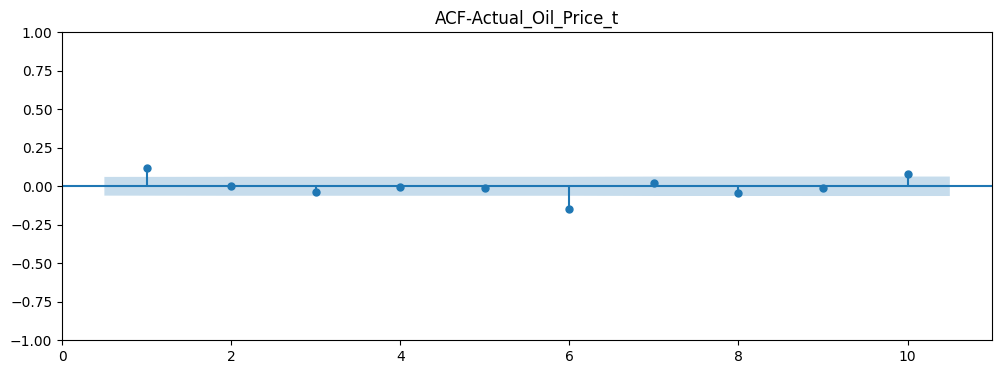

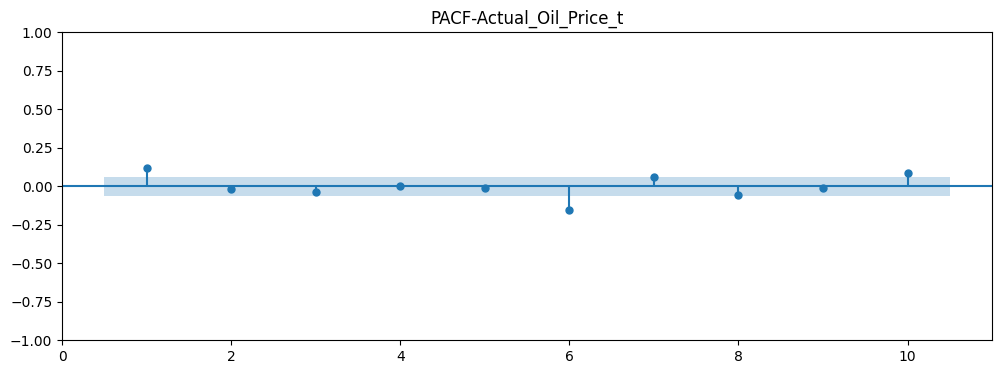

In [25]:
plot_acf_values(train_data['Actual_Oil_Price_t+1'].diff(1).dropna(),10,'ACF-Actual_Oil_Price_t')
plot_pacf_values(train_data['Actual_Oil_Price_t+1'].diff(1).dropna(),10,'PACF-Actual_Oil_Price_t')


In [29]:
train_data['Actual_Oil_Price_t+1_MA_5'] = train_data['Actual_Oil_Price_t+1'].rolling(window=5,min_periods=1).mean()


In [31]:
perform_adfuller(train_data['Actual_Oil_Price_t+1_MA_5'].diff(1).dropna(),'Actual_Oil_Price_t+1_MA_5')

Augmented Dickey-Fuller Test:
Test Statistic: -5.909522138350837
P-value: 2.6591861314859085e-07
The time series Actual_Oil_Price_t+1_MA_5 is stationary.


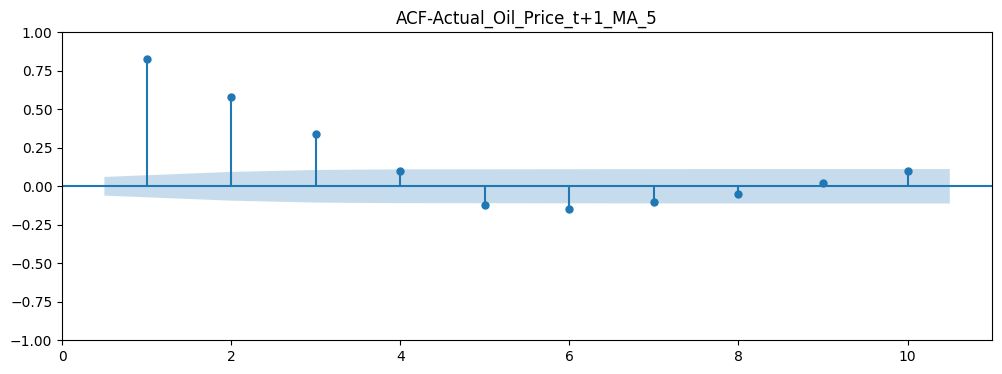

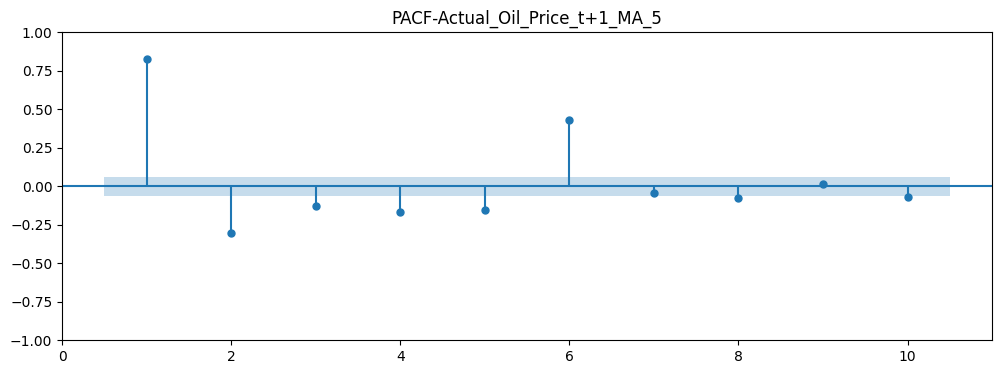

In [30]:
plot_acf_values(train_data['Actual_Oil_Price_t+1_MA_5'].diff(1).dropna(),10,'ACF-Actual_Oil_Price_t+1_MA_5')
plot_pacf_values(train_data['Actual_Oil_Price_t+1_MA_5'].diff(1).dropna(),10,'PACF-Actual_Oil_Price_t+1_MA_5')


In [32]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') and col.endswith('')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
PredictedColumnOil='Actual_Oil_Price_t+1_MA_5'
FeatureColumnsOil

['Actual_Oil_Price_t',
 'Actual_Oil_Price_t-1',
 'Actual_Oil_Price_t-2',
 'Actual_Oil_Price_t-3',
 'Actual_Oil_Price_t-4']

In [36]:

from sklearn.preprocessing import StandardScaler
train_data_Oil=train_data.copy()
# Scale the inputs to improve performance
Oilscaler = StandardScaler()
train_data_Oil[FeatureColumnsOil] = Oilscaler.fit_transform(train_data_Oil[FeatureColumnsOil])


In [37]:

from pmdarima import auto_arima
model = auto_arima(train_data_Oil[PredictedColumnOil],train_data_Oil[FeatureColumnsOil],seasonal=False,trace=True,d=1,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.summary()


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.249, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=667.587, Time=8.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=644.410, Time=12.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=646.827, Time=8.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=652.304, Time=9.96 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=667.505, Time=4.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=675.938, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=666.358, Time=5.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=643.770, Time=3.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=663.090, Time=3.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=662.453, Time=10.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=668.320, Time=3.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=661.949, Time=3.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=667.869, Time=3.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=663.936, Time=6.59 sec
 ARIMA(3,1,0)(0,0,0)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1039
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -311.885
Date:                Tue, 22 Aug 2023   AIC                            643.770
Time:                        08:29:55   BIC                            693.220
Sample:                    01-08-2019   HQIC                           662.530
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                0.0113      0.035      0.324      0.746      -0.057       0.080
Actual_Oil_Price_t      -1.3684      1.849     -0.740      0.459      -4.993       2.256
Actual_Oil_Price_t-1     1.6315      2.456      0.664      0.507      -3.183       6.446
Actual_Oil_Price_t-2     4.7989      1.231      3.900      0.000       2.387       7.211
Actual_Oil_Price_t-3     4.3199      0.139     31.020      0.000       4.047       4.593
Actual_Oil_Price_t-4     0.2186      0.247      0.885      0.376      -0.266       0.703
ar.L1                   -0.0112      0.411     -0.027      0.978      -0.817       0.794
ma.L1                    1.4526      0.040     36.091      0.000       1.374       1.531
ma.L2                    0.8445      0.037     22.690      0.000       0.772       0.917
sigma2                   0.1064      0.002     48.741      0.000       0.102       0.111
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4957.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

oil_model=SARIMAX(train_data_Oil[PredictedColumnOil],order=(2,1,3),exog=train_data_Oil[FeatureColumnsOil])
oil_model_fit=oil_model.fit(maxiter=1000)
oil_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Actual_Oil_Price_t+1_MA_5   No. Observations:                 1039
Model:                      SARIMAX(2, 1, 3)   Log Likelihood                -308.867
Date:                       Tue, 22 Aug 2023   AIC                            639.733
Time:                               08:30:48   BIC                            694.129
Sample:                           01-08-2019   HQIC                           660.370
                                - 12-30-2022                                         
Covariance Type:                         opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Actual_Oil_Price_t       4.3825      0.845      5.186      0.000       2.726       6.039
Actual_Oil_Price_t-1     4.3314      0.232     18.655      0.000       3.876       4.786
Actual_Oil_Price_t-2     4.4568      0.176     25.365      0.000       4.112       4.801
Actual_Oil_Price_t-3     4.8950      0.173     28.290      0.000       4.556       5.234
Actual_Oil_Price_t-4    -0.4432      0.146     -3.040      0.002      -0.729      -0.157
ar.L1                   -1.5824      0.028    -56.946      0.000      -1.637      -1.528
ar.L2                   -0.9077      0.027    -33.563      0.000      -0.961      -0.855
ma.L1                    1.7850      0.175     10.171      0.000       1.441       2.129
ma.L2                    1.2984      0.265      4.907      0.000       0.780       1.817
ma.L3                    0.2788      0.156      1.786      0.074      -0.027       0.585
sigma2                   0.1061      0.002     48.750      0.000       0.102       0.110
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4996.71
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

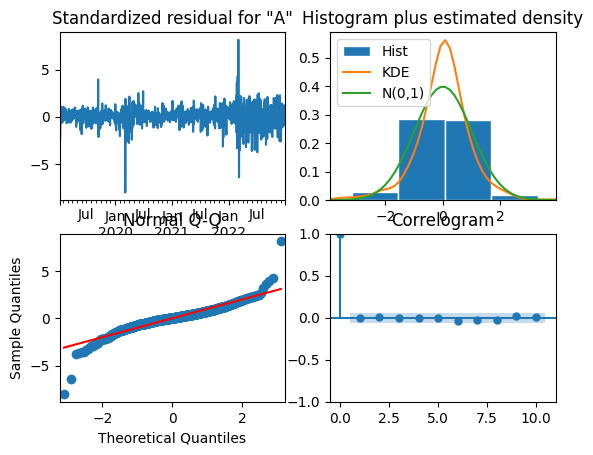

In [39]:
oil_model_fit.plot_diagnostics()
plt.show()

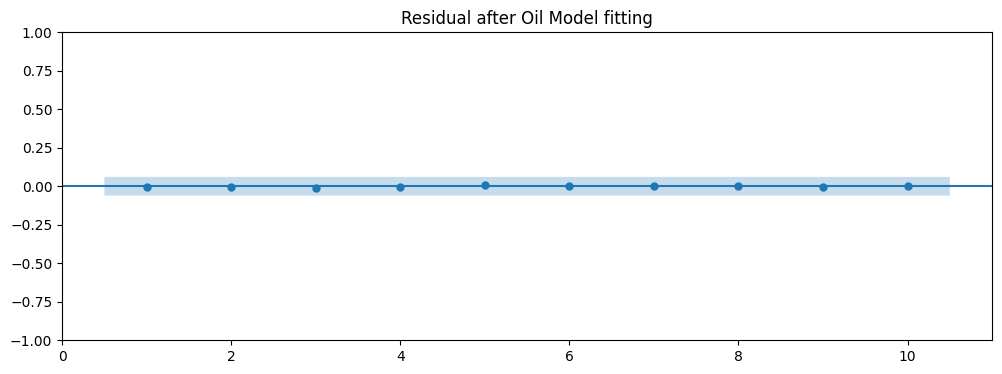

In [40]:
plot_acf_values(oil_model_fit.resid,10,"Residual after Oil Model fitting")

In [41]:
pd.set_option('display.max_rows', 100)


In [42]:
#FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t') and col.endswith('')]
#FeatureColumnsOil.remove('Actual_Oil_Price_t+1')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(FeatureColumnsOil)
  X_test = test_data[FeatureColumnsOil].values
  X_test_scaled = Oilscaler.transform(X_test)
  test_data['Predicted_Oil_Price_t+'+str(i)] = oil_model_fit.get_forecast(steps=len(test_data), exog=X_test_scaled).predicted_mean
  FeatureColumnsOil.pop(-1)
  FeatureColumnsOil.insert(0,'Predicted_Oil_Price_t+'+str(i))


['Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3', 'Actual_Oil_Price_t-4']
['Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3']
['Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2']
['Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1']
['Predicted_Oil_Price_t+4', 'Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t']


In [43]:
Oilresults = []

Oilresults.append(calculate_metrics(test_data['Actual_Oil_Price_t+1'], test_data['Predicted_Oil_Price_t+1'], 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', 1))
Oilresults.append(calculate_metrics(test_data['Actual_Oil_Price_t+2'], test_data['Predicted_Oil_Price_t+2'], 'Actual_Oil_Price_t+2', 'Predicted_Oil_Price_t+2', 2))
Oilresults.append(calculate_metrics(test_data['Actual_Oil_Price_t+3'], test_data['Predicted_Oil_Price_t+3'], 'Actual_Oil_Price_t+3', 'Predicted_Oil_Price_t+3', 3))
Oilresults.append(calculate_metrics(test_data['Actual_Oil_Price_t+4'], test_data['Predicted_Oil_Price_t+4'], 'Actual_Oil_Price_t+4', 'Predicted_Oil_Price_t+4', 4))
Oilresults.append(calculate_metrics(test_data['Actual_Oil_Price_t+5'], test_data['Predicted_Oil_Price_t+5'], 'Actual_Oil_Price_t+5', 'Predicted_Oil_Price_t+5', 5))

OilMetrics = pd.DataFrame(Oilresults)
OilMetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.803218,5.584300,2.363112,2.308187
1,Actual_Oil_Price_t+2,Predicted_Oil_Price_t+2,2,2.086354,7.394533,2.719289,2.671800
2,Actual_Oil_Price_t+3,Predicted_Oil_Price_t+3,3,2.357982,9.145064,3.024081,3.019399
3,Actual_Oil_Price_t+4,Predicted_Oil_Price_t+4,4,2.696761,11.057904,3.325343,3.452683
4,Actual_Oil_Price_t+5,Predicted_Oil_Price_t+5,5,3.077216,13.761171,3.709605,3.942619


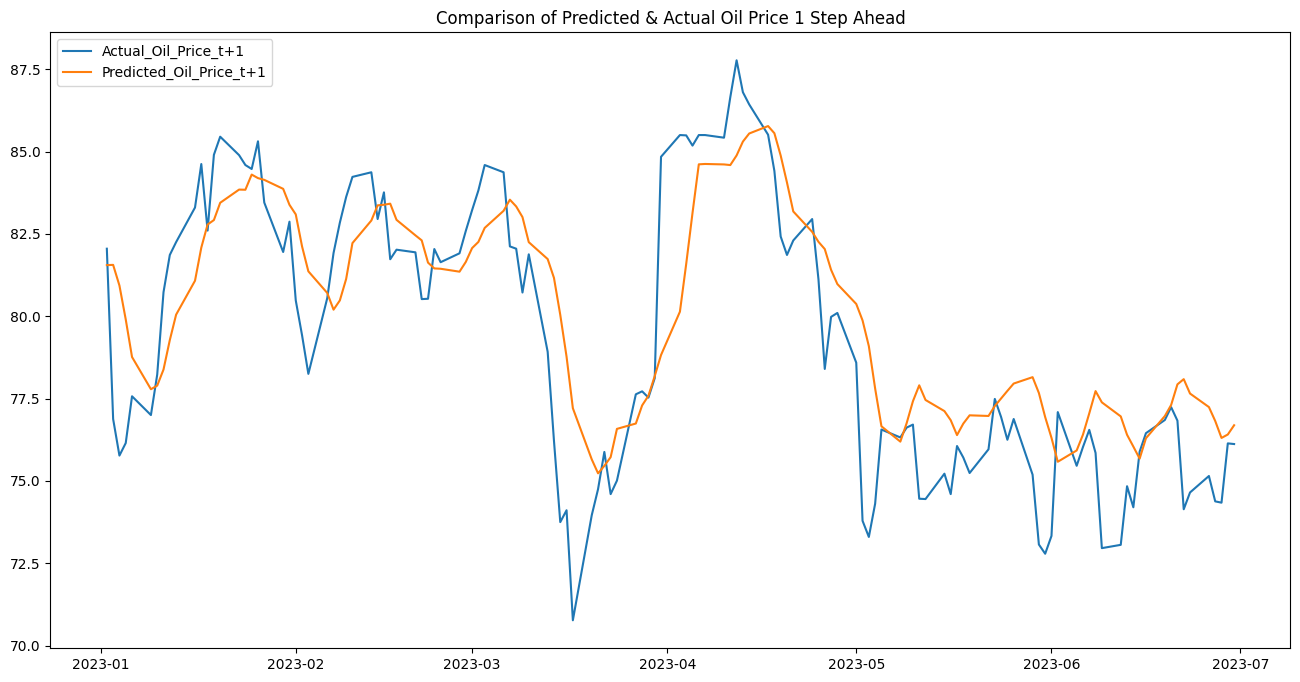

In [47]:
compare_plots(test_data['Actual_Oil_Price_t+1'],test_data['Predicted_Oil_Price_t+1'],'Actual_Oil_Price_t+1','Predicted_Oil_Price_t+1','Comparison of Predicted & Actual Oil Price 1 Step Ahead')

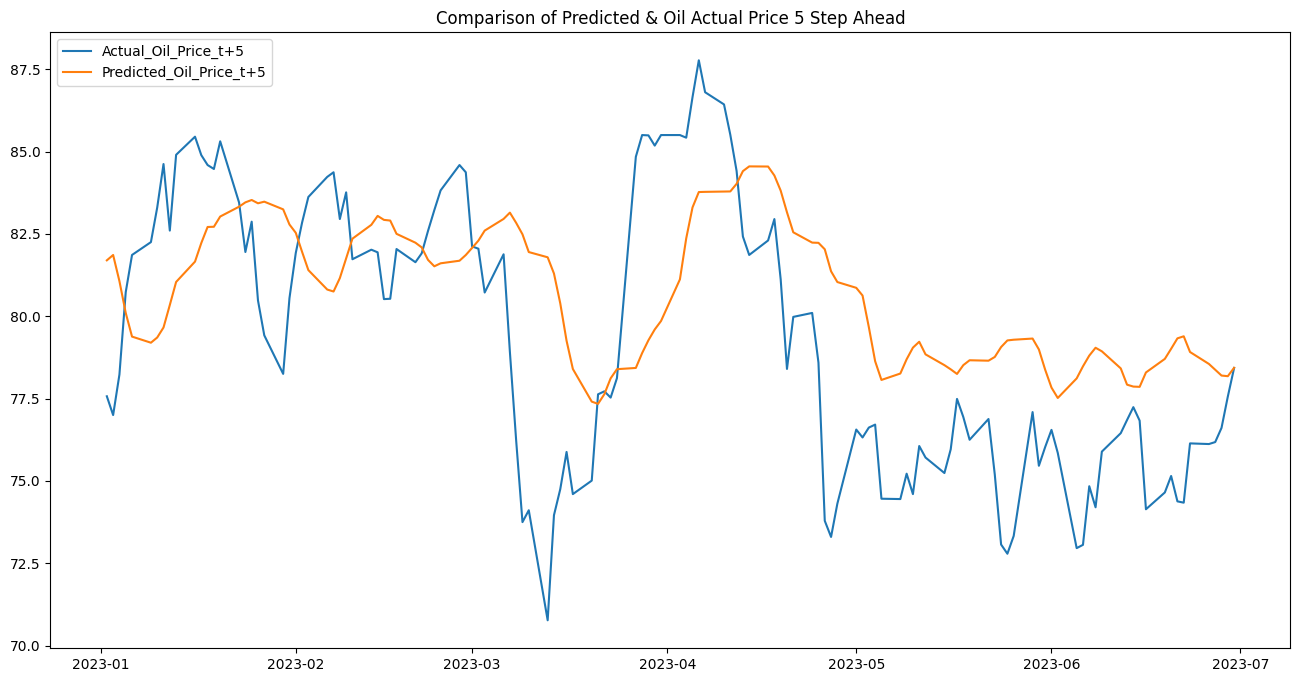

In [48]:
compare_plots(test_data['Actual_Oil_Price_t+5'],test_data['Predicted_Oil_Price_t+5'],'Actual_Oil_Price_t+5','Predicted_Oil_Price_t+5','Comparison of Predicted & Oil Actual Price 5 Step Ahead')

# CUrrency

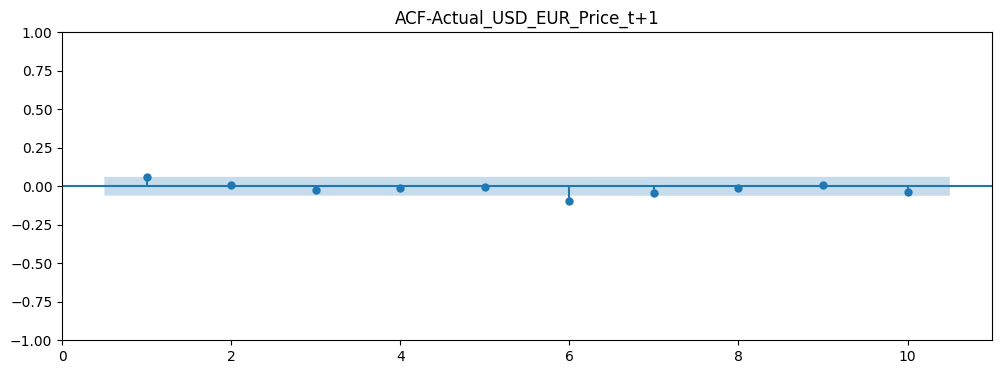

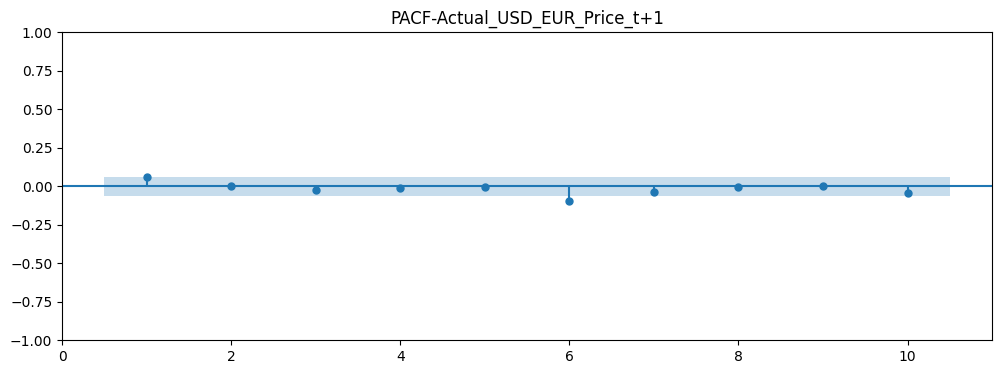

In [49]:
plot_acf_values(train_data['Actual_USD_EUR_Price_t+1'].diff(1).dropna(),10,'ACF-Actual_USD_EUR_Price_t+1')
plot_pacf_values(train_data['Actual_USD_EUR_Price_t+1'].diff(1).dropna(),10,'PACF-Actual_USD_EUR_Price_t+1')

In [51]:
train_data['Actual_USD_EUR_Price_t+1_MA_5'] = train_data['Actual_USD_EUR_Price_t+1'].rolling(window=5,min_periods=1).mean()


In [52]:
perform_adfuller(train_data['Actual_USD_EUR_Price_t+1_MA_5'].diff(1).dropna(),'Actual_USD_EUR_Price_t+1_MA_5')

Augmented Dickey-Fuller Test:
Test Statistic: -5.720396516547429
P-value: 6.962979203752184e-07
The time series Actual_USD_EUR_Price_t+1_MA_5 is stationary.


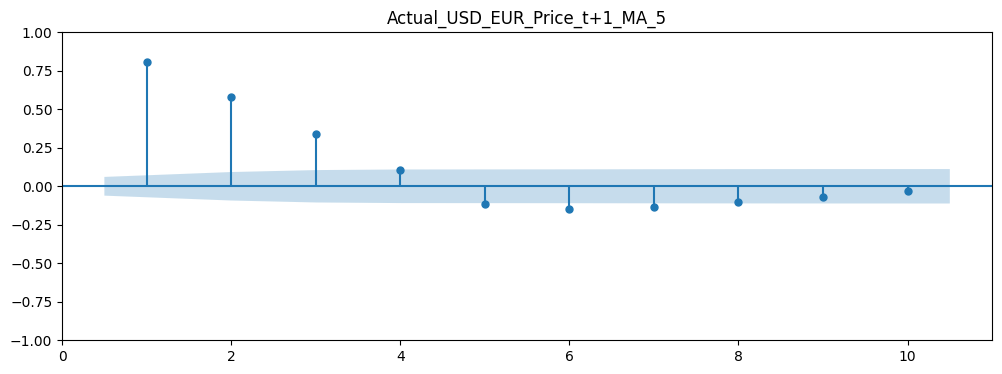

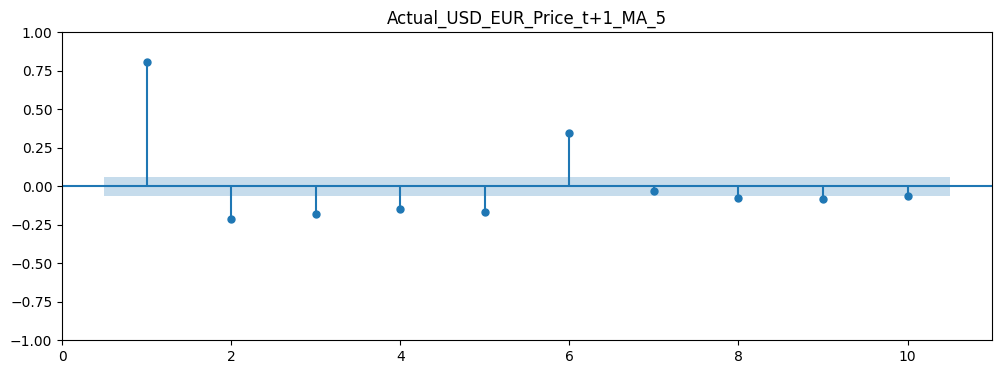

In [53]:
plot_acf_values(train_data['Actual_USD_EUR_Price_t+1_MA_5'].diff(1).dropna(),10,'Actual_USD_EUR_Price_t+1_MA_5')
plot_pacf_values(train_data['Actual_USD_EUR_Price_t+1_MA_5'].diff(1).dropna(),10,'Actual_USD_EUR_Price_t+1_MA_5')

In [54]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_USD_EUR_Price_t')
PredictedColumnCurrency='Actual_USD_EUR_Price_t+1_MA_5'
FeatureColumnsCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4']

In [55]:

from sklearn.preprocessing import StandardScaler
train_data_Cur=train_data.copy()
# Scale the inputs to improve performance
Curscaler = StandardScaler()
train_data_Cur[FeatureColumnsCurrency] = Curscaler.fit_transform(train_data_Cur[FeatureColumnsCurrency])



In [56]:

from pmdarima import auto_arima
model = auto_arima(train_data_Cur[PredictedColumnCurrency],train_data_Cur[FeatureColumnsCurrency],seasonal=False,trace=True,d=1,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.summary()


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11379.290, Time=2.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11377.292, Time=1.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11375.298, Time=1.95 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11373.261, Time=2.62 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-11371.249, Time=2.03 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-11369.635, Time=4.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11377.311, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11375.264, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11373.265, Time=2.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11371.203, Time=1.21 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-11369.184, Time=2.90 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11375.232, Time=2.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11373.186, Time=3.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11371.273, Time=1.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11369

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1039
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5696.645
Date:                Tue, 22 Aug 2023   AIC                         -11379.290
Time:                        08:35:34   BIC                         -11344.674
Sample:                    01-08-2019   HQIC                        -11366.157
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                -1.862e-05   3.18e-05     -0.586      0.558   -8.09e-05    4.36e-05
Actual_USD_EUR_Price_t       0.0126      0.000     37.635      0.000       0.012       0.013
Actual_USD_EUR_Price_t-1     0.0120      0.000     37.720      0.000       0.011       0.013
Actual_USD_EUR_Price_t-2     0.0116      0.000     34.357      0.000       0.011       0.012
Actual_USD_EUR_Price_t-3     0.0118      0.000     37.113      0.000       0.011       0.012
Actual_USD_EUR_Price_t-4    -0.0002      0.000     -0.599      0.549      -0.001       0.000
sigma2                    1.001e-06   3.24e-08     30.910      0.000    9.38e-07    1.06e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               183.67
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

cur_model=SARIMAX(train_data_Cur[PredictedColumnCurrency],order=(2,1,1),exog=train_data_Cur[FeatureColumnsCurrency])
cur_model_fit=cur_model.fit(maxiter=1000)
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Actual_USD_EUR_Price_t+1_MA_5   No. Observations:                 1039
Model:                          SARIMAX(2, 1, 1)   Log Likelihood                5696.389
Date:                           Tue, 22 Aug 2023   AIC                         -11374.779
Time:                                   08:36:29   BIC                         -11330.273
Sample:                               01-08-2019   HQIC                        -11357.894
                                    - 12-30-2022                                         
Covariance Type:                             opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Actual_USD_EUR_Price_t       0.0126      0.002      6.954      0.000       0.009       0.016
Actual_USD_EUR_Price_t-1     0.0120      0.002      5.222      0.000       0.008       0.017
Actual_USD_EUR_Price_t-2     0.0116      0.001     10.524      0.000       0.009       0.014
Actual_USD_EUR_Price_t-3     0.0118      0.001     21.790      0.000       0.011       0.013
Actual_USD_EUR_Price_t-4    -0.0002      0.000     -0.588      0.557      -0.001       0.000
ar.L1                       -0.4237      0.073     -5.798      0.000      -0.567      -0.280
ar.L2                        0.0080      0.195      0.041      0.967      -0.373       0.389
ma.L1                        0.4269      0.074      5.788      0.000       0.282       0.571
sigma2                    9.958e-07   3.25e-08     30.640      0.000    9.32e-07    1.06e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               180.50
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+17. Standard errors may be unstable.
"""

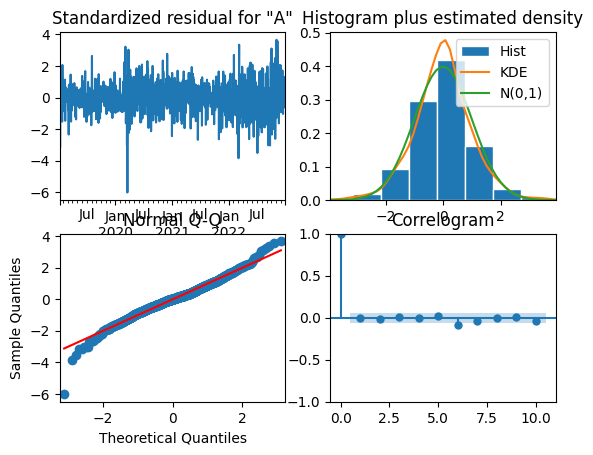

In [58]:
cur_model_fit.plot_diagnostics()
plt.show()



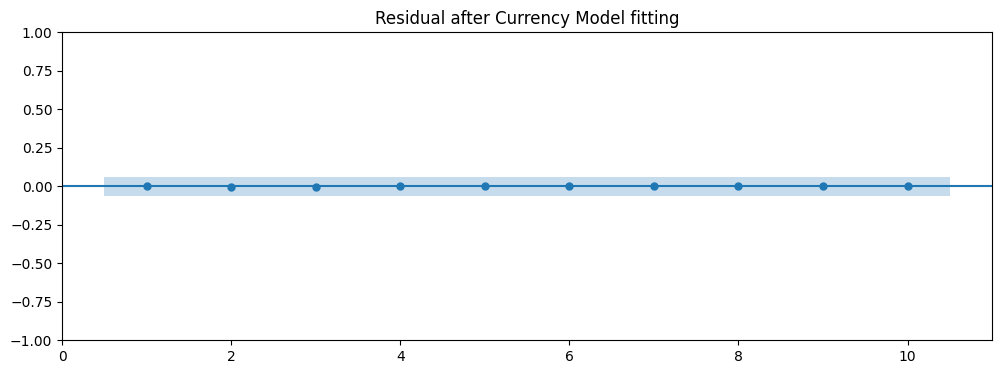

In [59]:
plot_acf_values(cur_model_fit.resid,10,"Residual after Currency Model fitting")

In [60]:
StepsAheadPrediction=5

for i in range(1,StepsAheadPrediction+1):
  X_test = test_data[FeatureColumnsCurrency].values
  X_test_scaled = Curscaler.transform(X_test)
  print(FeatureColumnsCurrency)
  test_data['Predicted_USD_EUR_Price_t+'+str(i)+'']= cur_model_fit.get_forecast(steps=len(test_data), exog=X_test_scaled).predicted_mean
  FeatureColumnsCurrency.pop(-1)
  FeatureColumnsCurrency.insert(0,'Predicted_USD_EUR_Price_t+'+str(i)+'')

['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4']
['Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3']
['Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2']
['Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1']
['Predicted_USD_EUR_Price_t+4', 'Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t']


In [61]:
Exchangeresults = []

Exchangeresults.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+1'], test_data['Predicted_USD_EUR_Price_t+1'], 'Actual_USD_EUR_Price_t+1', 'Predicted_USD_EUR_Price_t+1', 1))
Exchangeresults.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+2'], test_data['Predicted_USD_EUR_Price_t+2'], 'Actual_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+2', 2))
Exchangeresults.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+3'], test_data['Predicted_USD_EUR_Price_t+3'], 'Actual_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+3', 3))
Exchangeresults.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+4'], test_data['Predicted_USD_EUR_Price_t+4'], 'Actual_USD_EUR_Price_t+4', 'Predicted_USD_EUR_Price_t+4', 4))
Exchangeresults.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+5'], test_data['Predicted_USD_EUR_Price_t+5'], 'Actual_USD_EUR_Price_t+5 ', 'Predicted_USD_EUR_Price_t+5', 5))
pd.set_option('display.max_colwidth', None)

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_t+1,1,0.005532,0.000048,0.006947,0.510904
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_t+2,2,0.006354,0.000063,0.007945,0.586489
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_t+3,3,0.007119,0.000076,0.008732,0.656566
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_t+4,4,0.007959,0.000092,0.009582,0.733311
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_t+5,5,0.008958,0.000113,0.010616,0.824390


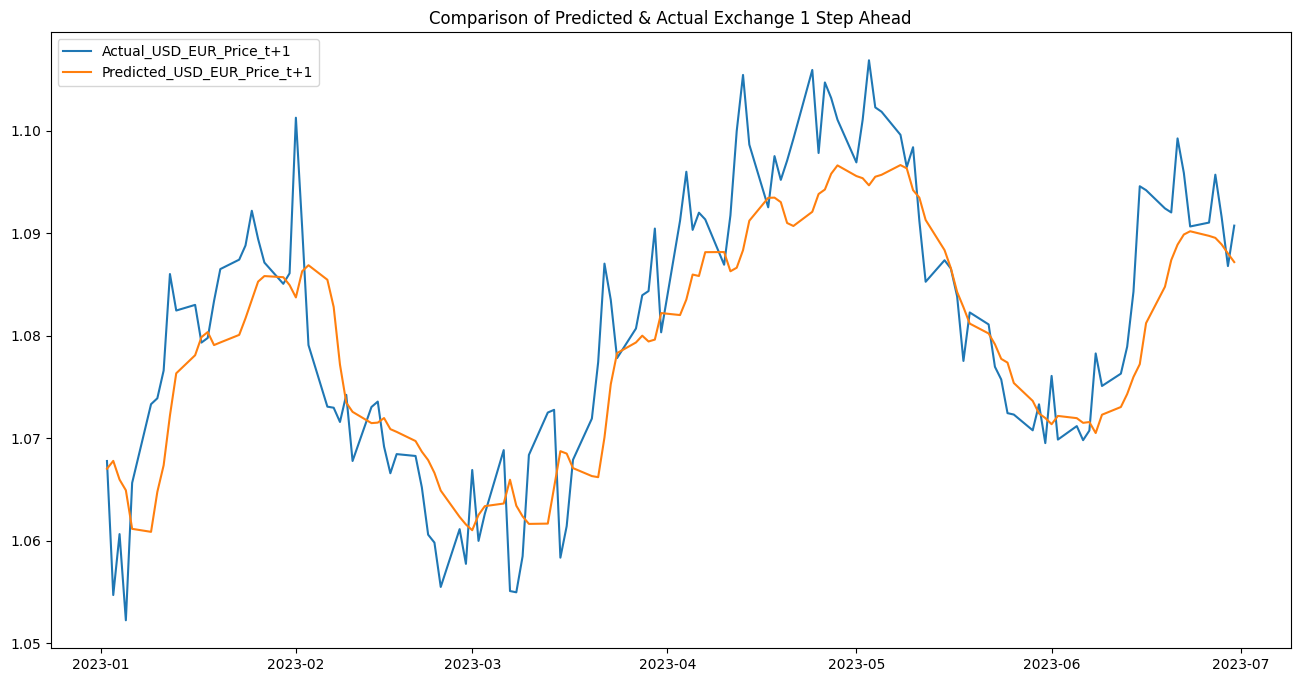

In [62]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],test_data['Predicted_USD_EUR_Price_t+1'],'Actual_USD_EUR_Price_t+1','Predicted_USD_EUR_Price_t+1','Comparison of Predicted & Actual Exchange 1 Step Ahead')

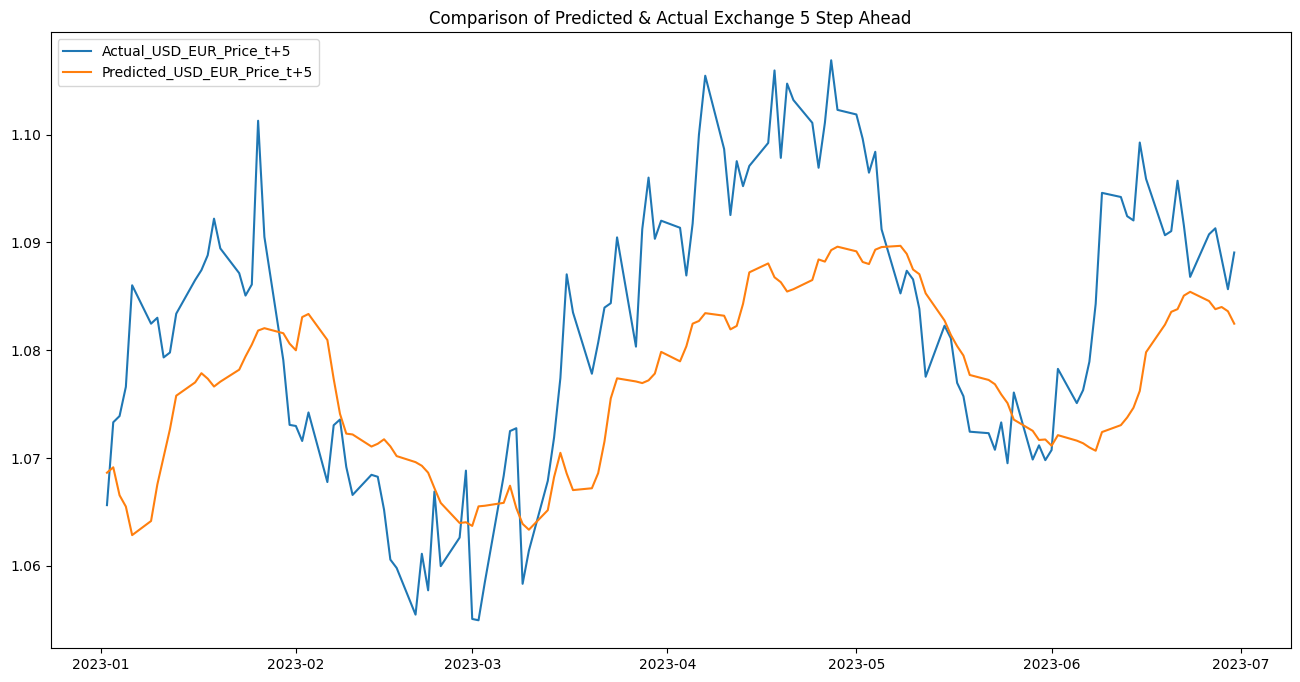

In [63]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],test_data['Predicted_USD_EUR_Price_t+5'],'Actual_USD_EUR_Price_t+5','Predicted_USD_EUR_Price_t+5','Comparison of Predicted & Actual Exchange 5 Step Ahead')

#CUrrency+ Oil

In [64]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_USD_EUR_Price_t')
FeatureColumnsOilCurrency.append('Actual_Oil_Price_t+1')
PredictedColumnOilCurrency='Actual_USD_EUR_Price_t+1_MA_5'
FeatureColumnsOilCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4',
 'Actual_Oil_Price_t+1']

In [65]:
from sklearn.preprocessing import StandardScaler
train_data_CurOil=train_data.copy()
# Scale the inputs to improve performance
CurOilscaler = StandardScaler()
train_data_CurOil[FeatureColumnsOilCurrency] = CurOilscaler.fit_transform(train_data_CurOil[FeatureColumnsOilCurrency])



In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

cur_Oil_model=SARIMAX(train_data_CurOil[PredictedColumnOilCurrency],order=(2,1,1),exog=train_data_CurOil[FeatureColumnsOilCurrency])
cur_oil_model_fit=cur_Oil_model.fit(maxiter=1000)
cur_oil_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Actual_USD_EUR_Price_t+1_MA_5   No. Observations:                 1039
Model:                          SARIMAX(2, 1, 1)   Log Likelihood                5696.462
Date:                           Tue, 22 Aug 2023   AIC                         -11372.925
Time:                                   08:37:43   BIC                         -11323.474
Sample:                               01-08-2019   HQIC                        -11354.164
                                    - 12-30-2022                                         
Covariance Type:                             opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Actual_USD_EUR_Price_t       0.0126      0.002      6.897      0.000       0.009       0.016
Actual_USD_EUR_Price_t-1     0.0120      0.002      5.074      0.000       0.007       0.017
Actual_USD_EUR_Price_t-2     0.0116      0.001     10.614      0.000       0.009       0.014
Actual_USD_EUR_Price_t-3     0.0118      0.001     22.544      0.000       0.011       0.013
Actual_USD_EUR_Price_t-4    -0.0002      0.000     -0.617      0.537      -0.001       0.000
Actual_Oil_Price_t+1        -0.0002      0.000     -0.623      0.534      -0.001       0.000
ar.L1                       -0.4051      0.073     -5.528      0.000      -0.549      -0.262
ar.L2                        0.0079      0.200      0.039      0.969      -0.385       0.400
ma.L1                        0.4086      0.074      5.529      0.000       0.264       0.553
sigma2                    9.956e-07   3.31e-08     30.077      0.000    9.31e-07    1.06e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               176.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+17. Standard errors may be unstable.
"""

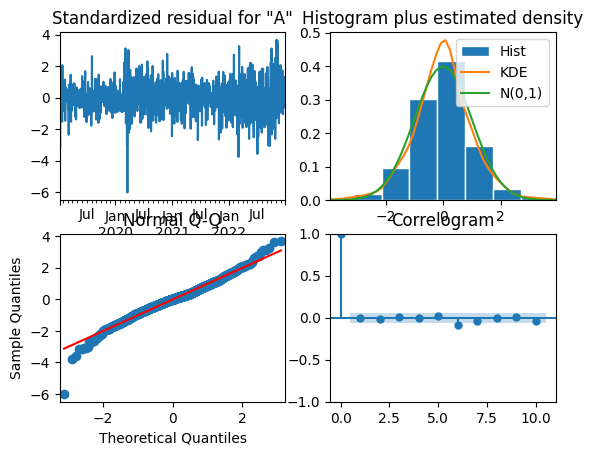

In [67]:
cur_oil_model_fit.plot_diagnostics()
plt.show()


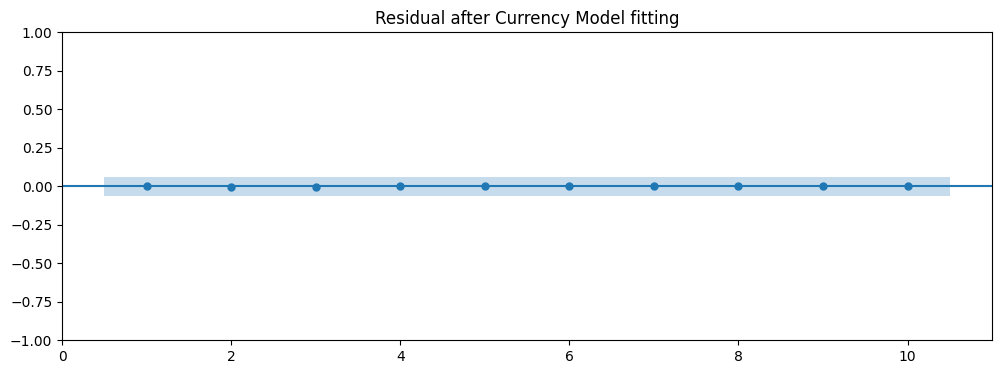

In [ ]:
plot_acf_values(cur_oil_model_fit.resid,10,"Residual after Currency Model fitting")

In [68]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_USD_EUR_Price_t')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  FeatureColumnsOilCurrency.append('Predicted_Oil_Price_t+'+ str(i)+'')
  print(FeatureColumnsOilCurrency)
  X_test = test_data[FeatureColumnsOilCurrency].values
  X_test_scaled = CurOilscaler.transform(X_test)

  test_data['Predicted_USD_EUR_Price_WithOil_t+'+str(i)] = cur_oil_model_fit.get_forecast(steps=len(test_data), exog=X_test_scaled).predicted_mean
  FeatureColumnsOilCurrency.remove('Predicted_Oil_Price_t+'+ str(i)+'')
  FeatureColumnsOilCurrency.pop(-1)
  FeatureColumnsOilCurrency.insert(0,'Predicted_USD_EUR_Price_WithOil_t+'+str(i))


['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4', 'Predicted_Oil_Price_t+1']
['Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Predicted_Oil_Price_t+2']
['Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Predicted_Oil_Price_t+3']
['Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Predicted_Oil_Price_t+4']
['Predicted_USD_EUR_Price_WithOil_t+4', 'Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Predicted_Oil_Price_t+5']


In [69]:
ExchangeresultsWithOil = []

ExchangeresultsWithOil.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+1'], test_data['Predicted_USD_EUR_Price_WithOil_t+1'], 'Actual_USD_EUR_Price_t+1', 'Predicted_USD_EUR_Price_WithOil_t+1', 1))
ExchangeresultsWithOil.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+2'], test_data['Predicted_USD_EUR_Price_WithOil_t+2'], 'Actual_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_WithOil_t+2', 2))
ExchangeresultsWithOil.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+3'], test_data['Predicted_USD_EUR_Price_WithOil_t+3'], 'Actual_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_WithOil_t+3', 3))
ExchangeresultsWithOil.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+4'], test_data['Predicted_USD_EUR_Price_WithOil_t+4'], 'Actual_USD_EUR_Price_t+4', 'Predicted_USD_EUR_Price_WithOil_t+4', 4))
ExchangeresultsWithOil.append(calculate_metrics(test_data['Actual_USD_EUR_Price_t+5'], test_data['Predicted_USD_EUR_Price_WithOil_t+5'], 'Actual_USD_EUR_Price_t+5 ', 'Predicted_USD_EUR_Price_WithOil_t+5', 5))


In [70]:

OilExchangemetrics = pd.DataFrame(ExchangeresultsWithOil)
OilExchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_WithOil_t+1,1,0.005529,0.000048,0.006943,0.510666
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_WithOil_t+2,2,0.006351,0.000063,0.007939,0.586240
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_WithOil_t+3,3,0.007116,0.000076,0.008725,0.656296
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_WithOil_t+4,4,0.007955,0.000092,0.009573,0.732946
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_WithOil_t+5,5,0.008952,0.000112,0.010606,0.823876


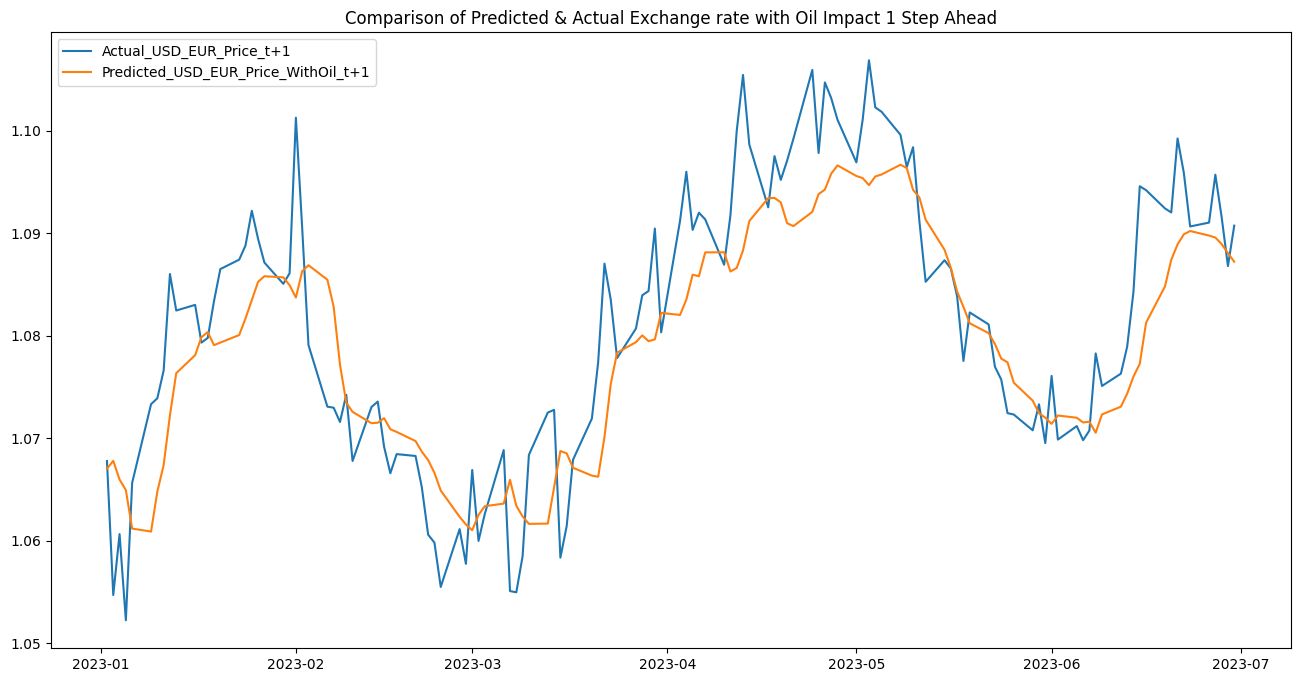

In [71]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],test_data['Predicted_USD_EUR_Price_WithOil_t+1'],'Actual_USD_EUR_Price_t+1','Predicted_USD_EUR_Price_WithOil_t+1','Comparison of Predicted & Actual Exchange rate with Oil Impact 1 Step Ahead')

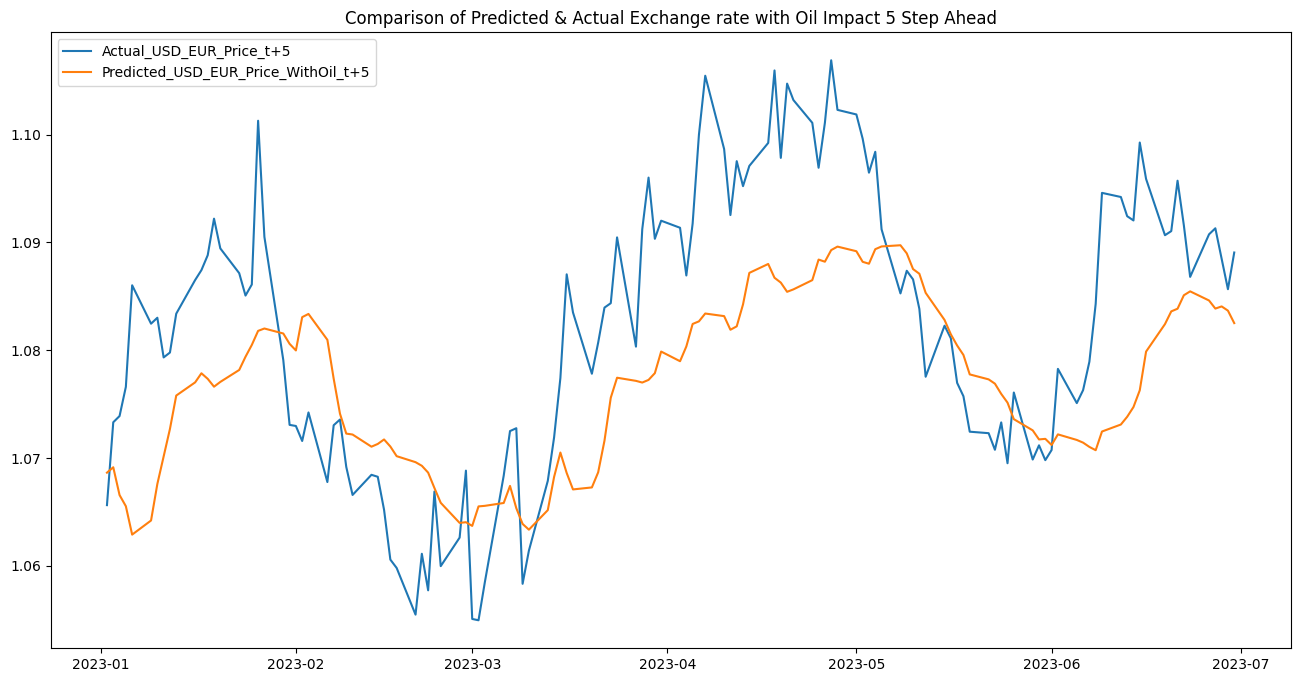

In [72]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],test_data['Predicted_USD_EUR_Price_WithOil_t+5'],'Actual_USD_EUR_Price_t+5','Predicted_USD_EUR_Price_WithOil_t+5','Comparison of Predicted & Actual Exchange rate with Oil Impact 5 Step Ahead')

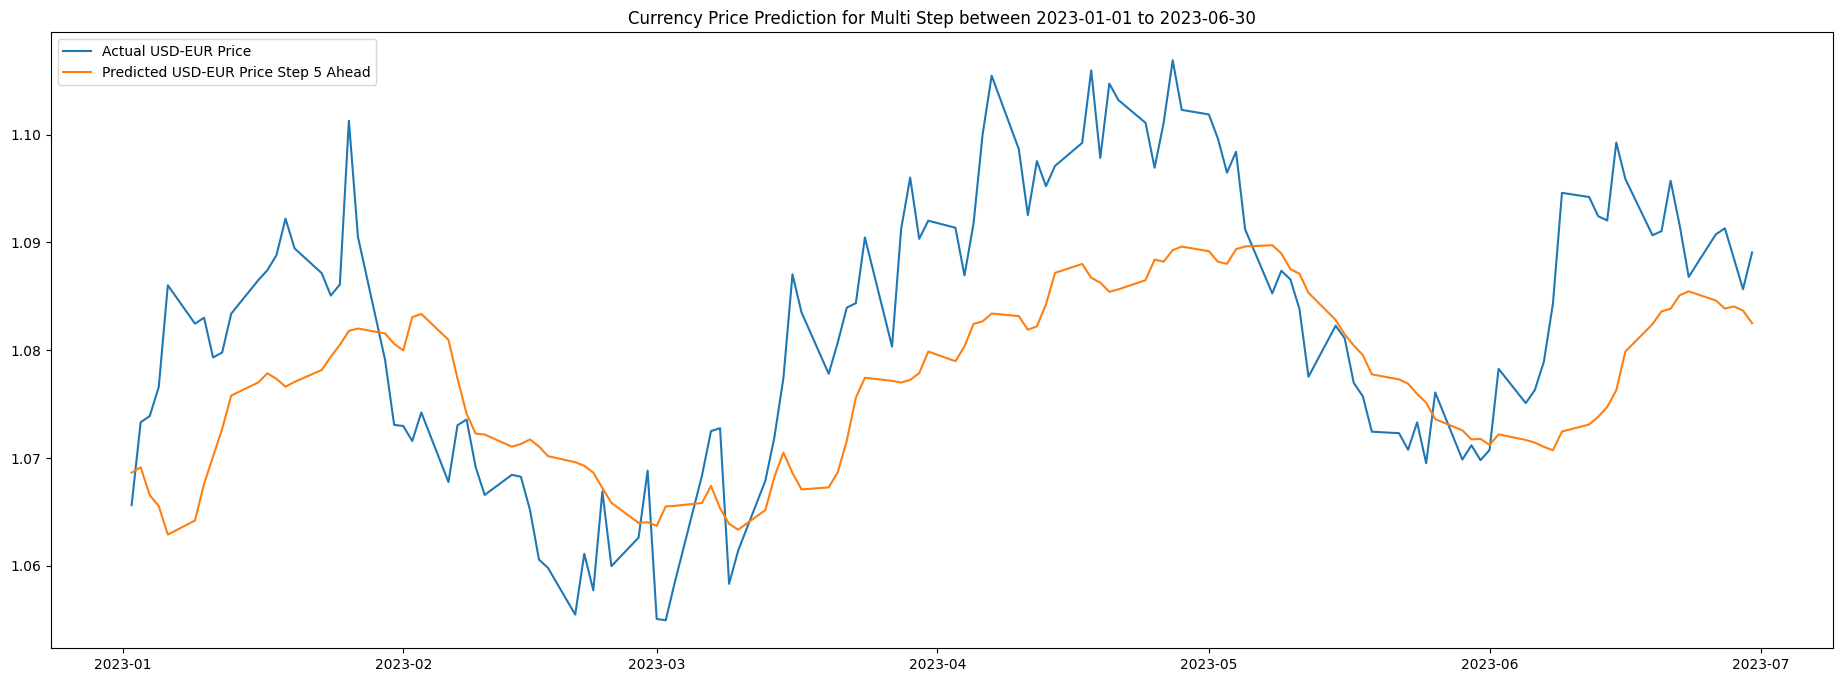

In [73]:

plt.figure(figsize=(23,8))
plt.plot(test_data['Actual_USD_EUR_Price_t+5'],label="Actual USD-EUR Price")
plt.plot(test_data['Predicted_USD_EUR_Price_WithOil_t+5'],label="Predicted USD-EUR Price Step 5 Ahead")
plt.title("Currency Price Prediction for Multi Step between 2023-01-01 to 2023-06-30")


plt.legend(loc="upper left")
plt.show()
